In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model, neighbors, preprocessing, metrics, model_selection, impute
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style


In [2]:
RhoMis = pd.read_csv("STA_208/data/RHoMIS_Indicators.csv", engine ="python")

RhoMis_full = pd.read_csv("STA_208/data/RHoMIS_Full_Data.csv", engine ="python")
full = RhoMis_full

data = RhoMis
data.head()

,ID_PROJ,ID_COUNTRY,YEAR,ITERATION,SURVEY_ID,ID_HH,GPS_LAT,GPS_LON,GPS_ALT,Country,...,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput
0,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_1_1,NaN,NaN,NaN,Tanzania,...,0.000000,1.000000,0.049505,3650.565755,0.000000,0,NaN,0.000000,1.000000,NaN
1,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_2_1,NaN,NaN,NaN,Tanzania,...,0.000000,1.000000,0.000000,3632.448997,0.000000,4,143.934000,0.499999,0.500001,75.0
2,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_3_1,NaN,NaN,NaN,Tanzania,...,0.000000,1.000000,0.129870,5314.779021,1750.000000,1,3248.700905,1.000000,0.000000,20.0
3,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_4_1,NaN,NaN,NaN,Tanzania,...,0.000000,NaN,NaN,257.234727,257.234727,0,887.156057,NaN,NaN,15.0
4,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_5_1,NaN,NaN,NaN,Tanzania,...,23.102694,0.931377,0.695041,925.310354,22.070240,0,14275.030776,1.000000,0.000000,50.0


In [3]:
data.describe()

,YEAR,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,HHsizeMAE,LandOwned,LandCultivated,LivestockHoldings,...,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput
count,13310.000000,13310.0,9969.000000,9969.000000,9969.000000,13310.000000,13222.000000,9111.000000,12903.000000,13310.000000,...,1.331000e+04,10598.000000,10598.000000,1.302800e+04,1.322200e+04,13310.000000,5.620000e+03,11207.000000,11207.000000,5620.000000
mean,2016.947784,1.0,2.719685,14.344785,871.929988,8.325770,6.473068,4.762885,8.776539,6.888155,...,7.800049e+02,0.847832,0.449711,1.527396e+07,1.484723e+07,1.632532,2.740420e+04,0.778967,0.221033,488.167254
std,0.957380,0.0,9.645855,34.337597,754.450962,35.297364,32.695694,39.575757,196.496336,25.423234,...,6.890473e+04,0.310008,0.436514,9.478605e+08,9.408028e+08,2.773458,8.016996e+04,0.316099,0.316099,6370.202993
min,2015.000000,1.0,-14.620000,-89.690000,-99.080000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,-1.333333,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2016.000000,1.0,-5.010000,-1.450000,328.000000,4.000000,3.360000,1.000000,1.000000,0.210000,...,0.000000e+00,0.905693,0.000000,8.537846e+02,2.250044e+02,0.000000,1.472622e+03,0.558216,0.000000,50.000000
50%,2017.000000,1.0,0.760000,29.860000,613.400000,6.000000,5.000000,2.000000,2.000000,1.730000,...,0.000000e+00,1.000000,0.317386,2.856091e+03,9.221568e+02,0.000000,1.135251e+04,0.999885,0.000115,100.000000
75%,2018.000000,1.0,11.300000,36.430000,1238.300000,9.000000,7.290000,4.000000,4.000000,5.140000,...,0.000000e+00,1.000000,1.000000,8.242241e+03,2.571877e+03,2.000000,3.029822e+04,1.000000,0.441784,250.000000
max,2018.000000,1.0,25.800000,85.380000,4191.260000,3984.000000,3703.890000,3500.000000,14000.000000,540.400000,...,7.943184e+06,1.000000,1.000000,8.245939e+10,8.245937e+10,12.000000,2.717704e+06,1.000000,1.000000,460000.000000


In [4]:
#the data is mostly complete. 
#drop FIES_score, region
#Year should not be numeric
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13310 entries, 0 to 13309
Data columns (total 53 columns):
ID_PROJ                                         13310 non-null object
ID_COUNTRY                                      13310 non-null object
YEAR                                            13310 non-null int64
ITERATION                                       13310 non-null int64
SURVEY_ID                                       13310 non-null object
ID_HH                                           13310 non-null object
GPS_LAT                                         9969 non-null float64
GPS_LON                                         9969 non-null float64
GPS_ALT                                         9969 non-null float64
Country                                         13310 non-null object
Region                                          1925 non-null object
Altitude                                        10905 non-null object
HHsizemembers                                   13310 

In [5]:
100*(data.isnull().sum()/13310)

ID_PROJ                                           0.000000
ID_COUNTRY                                        0.000000
YEAR                                              0.000000
ITERATION                                         0.000000
SURVEY_ID                                         0.000000
ID_HH                                             0.000000
GPS_LAT                                          25.101427
GPS_LON                                          25.101427
GPS_ALT                                          25.101427
Country                                           0.000000
Region                                           85.537190
Altitude                                         18.069121
HHsizemembers                                     0.000000
HHsizeMAE                                         0.661157
HouseholdType                                     0.142750
Head_EducationLevel                               3.095417
LandOwned                                        31.5477

In [6]:


data = data.drop(columns=["Region","FIES_Score"]) 



In [73]:
sns.displot("Food_Availability_kCal_MAE_day", data=data)

AttributeError: module 'seaborn' has no attribute 'displot'

In [7]:


#pulls out numeric values
numerics  = data.select_dtypes(include=['int64', "float64"])
numerics.head()

#scaler = preprocessing.StandardScaler()

#data[numerics] = scaler.fit_transform(data[numerics])
#head(data)

,YEAR,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,HHsizeMAE,LandOwned,LandCultivated,LivestockHoldings,...,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput
0,2015,1,NaN,NaN,NaN,4,3.32,NaN,0.8,0.30,...,0.000000,1.000000,0.049505,3650.565755,0.000000,0,NaN,0.000000,1.000000,NaN
1,2015,1,NaN,NaN,NaN,10,5.85,NaN,0.8,0.00,...,0.000000,1.000000,0.000000,3632.448997,0.000000,4,143.934000,0.499999,0.500001,75.0
2,2015,1,NaN,NaN,NaN,5,4.32,NaN,0.8,0.73,...,0.000000,1.000000,0.129870,5314.779021,1750.000000,1,3248.700905,1.000000,0.000000,20.0
3,2015,1,NaN,NaN,NaN,11,9.33,NaN,1.2,0.10,...,0.000000,NaN,NaN,257.234727,257.234727,0,887.156057,NaN,NaN,15.0
4,2015,1,NaN,NaN,NaN,6,5.41,NaN,0.8,2.75,...,23.102694,0.931377,0.695041,925.310354,22.070240,0,14275.030776,1.000000,0.000000,50.0


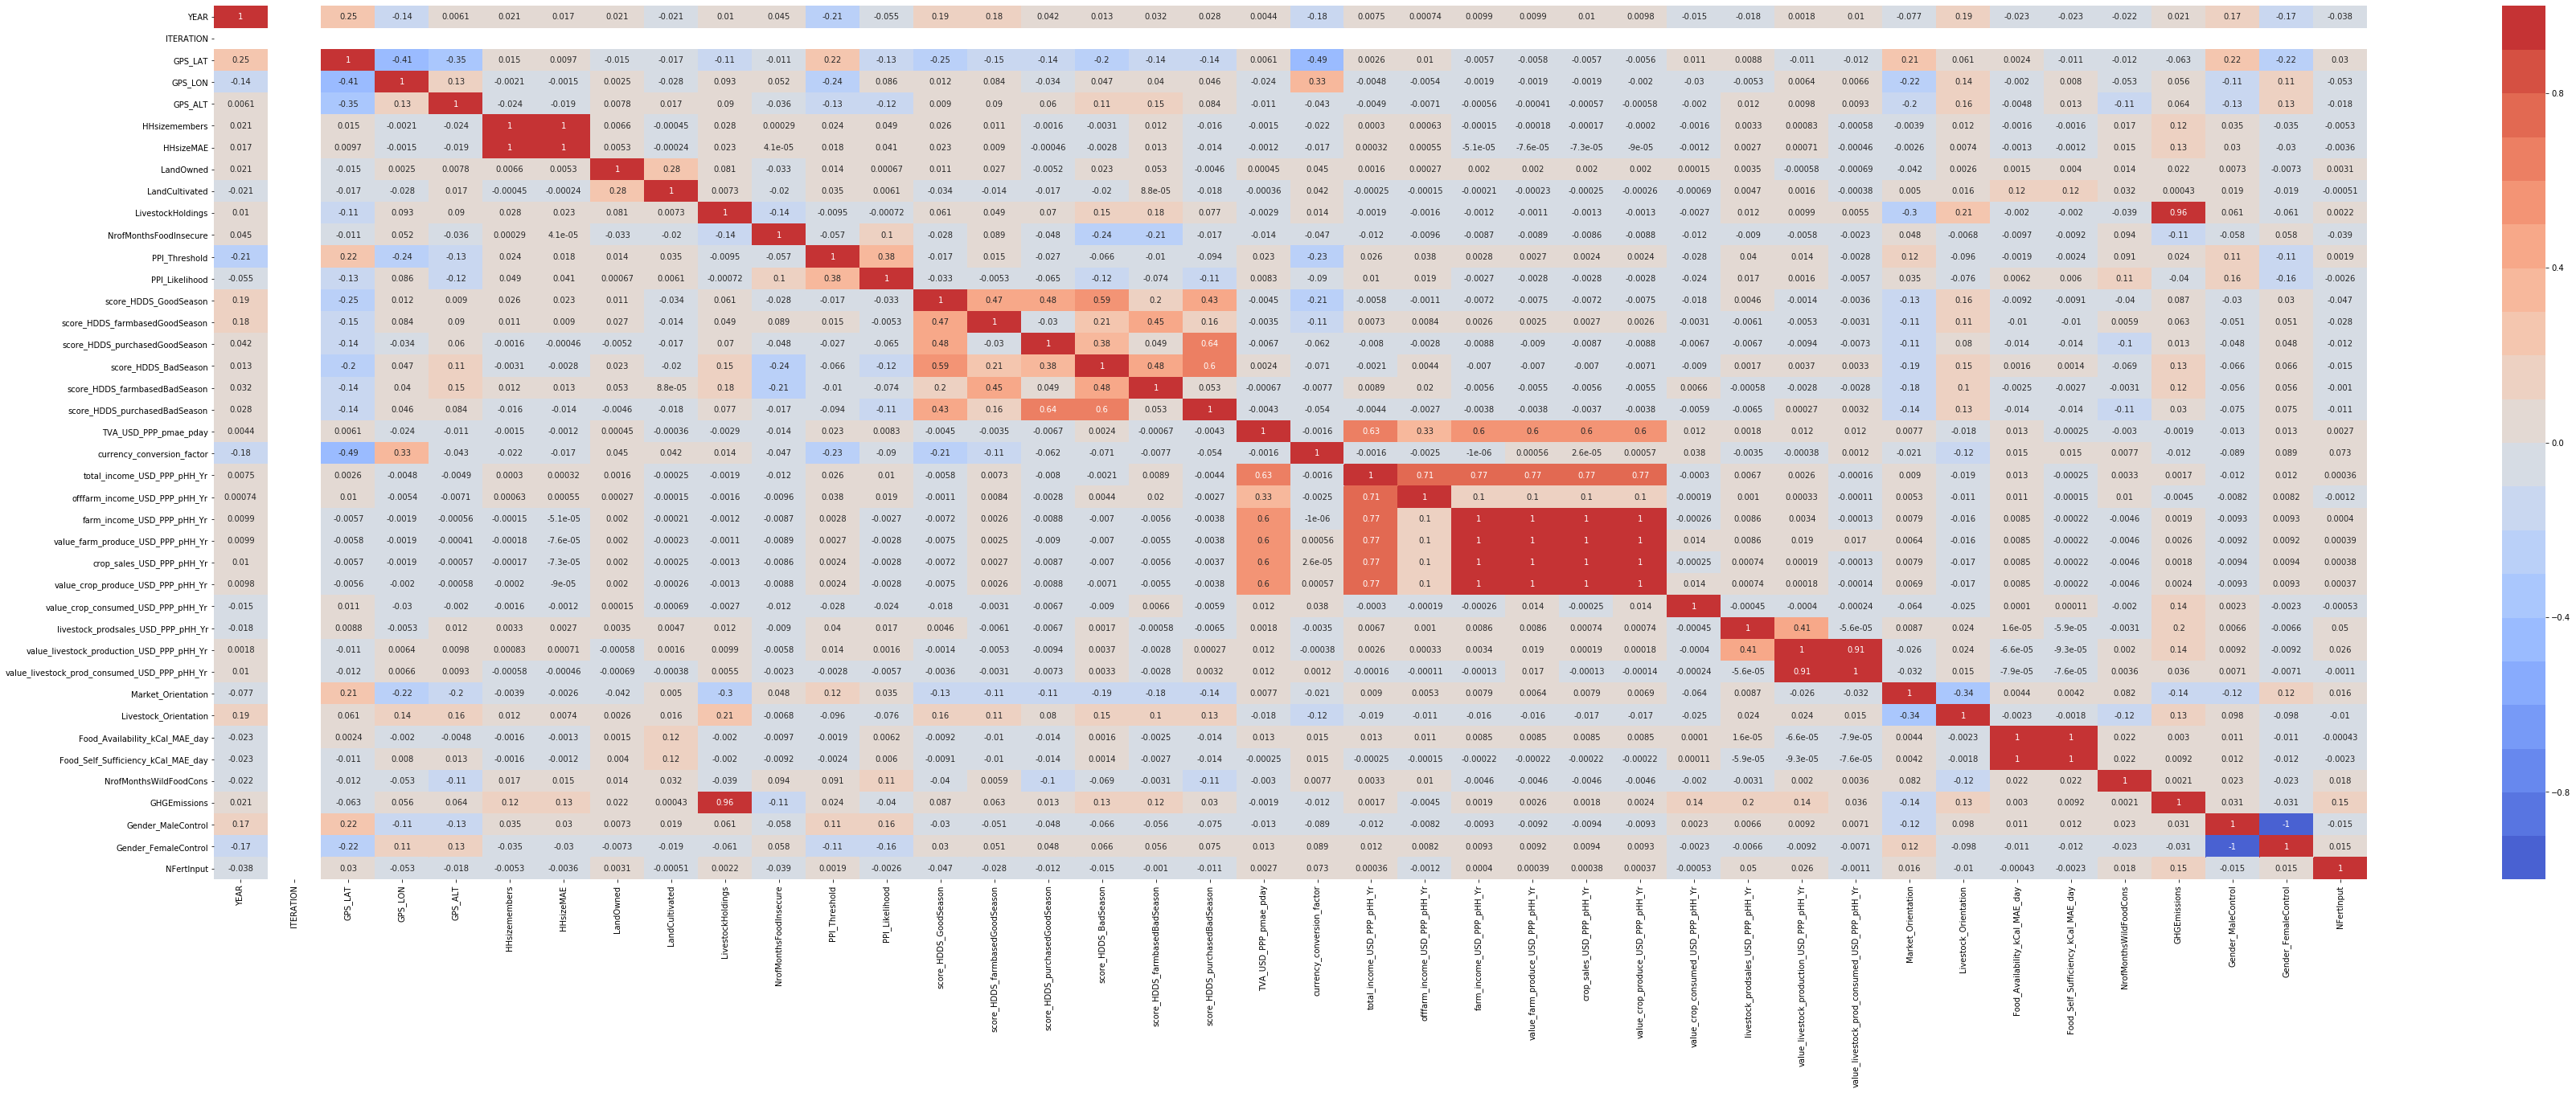

In [52]:
#Correlation Heat Map, only numerical variables here


corr = numerics.corr()

plt.figure(figsize=(60, 20))
sns.heatmap(corr, cmap=sns.color_palette("coolwarm", 20), annot=True);

[Text(0, 0, 'Tanzania'),
 Text(0, 0, 'Guatemala'),
 Text(0, 0, 'Honduras'),
 Text(0, 0, 'El_Salvador'),
 Text(0, 0, 'Mali'),
 Text(0, 0, 'Burkina_Faso'),
 Text(0, 0, 'Malawi'),
 Text(0, 0, 'Kenya'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'LaoPDR'),
 Text(0, 0, 'Ethiopia'),
 Text(0, 0, 'DRC'),
 Text(0, 0, 'Zambia'),
 Text(0, 0, 'Ghana'),
 Text(0, 0, 'Uganda'),
 Text(0, 0, 'Costa_Rica'),
 Text(0, 0, 'Burundi'),
 Text(0, 0, 'Peru'),
 Text(0, 0, 'Nicaragua')]

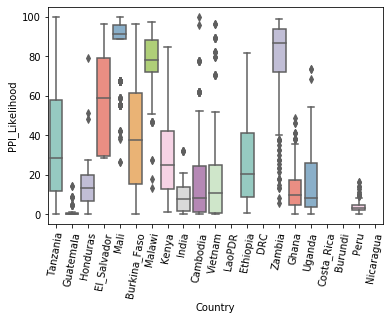

<Figure size 1440x720 with 0 Axes>

In [53]:

violin = sns.boxplot(x="Country", y='PPI_Likelihood',data = data, palette="Set3")

plt.figure(figsize=(20, 10))
violin.set_xticklabels(violin.get_xticklabels(), rotation=80)



In [18]:

data["Country"].unique()

#DRC is Democratic Republic of Congo
#LaoPDR is Lao People's Democratic Republic

array(['Tanzania', 'Guatemala', 'Honduras', 'El_Salvador', 'Mali',
       'Burkina_Faso', 'Malawi', 'Kenya', 'India', 'Cambodia', 'Vietnam',
       'LaoPDR', 'Ethiopia', 'DRC', 'Zambia', 'Ghana', 'Uganda',
       'Costa_Rica', 'Burundi', 'Peru', 'Nicaragua'], dtype=object)

TypeError: 'Figure' object is not callable

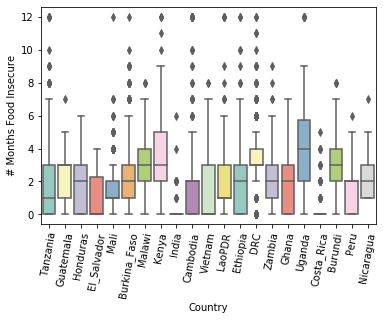

In [39]:

violin = sns.boxplot(x="Country", y='NrofMonthsFoodInsecure',data = data, palette="Set3")


violin.set_xticklabels(violin.get_xticklabels(), rotation=80)
violin.set(ylabel="# Months Food Insecure")

plt.figure(figsize=(14, 10), dpi=80)

[Text(0, 0, 'Tanzania'),
 Text(0, 0, 'Guatemala'),
 Text(0, 0, 'Honduras'),
 Text(0, 0, 'El_Salvador'),
 Text(0, 0, 'Mali'),
 Text(0, 0, 'Burkina_Faso'),
 Text(0, 0, 'Malawi'),
 Text(0, 0, 'Kenya'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'LaoPDR'),
 Text(0, 0, 'Ethiopia'),
 Text(0, 0, 'DRC'),
 Text(0, 0, 'Zambia'),
 Text(0, 0, 'Ghana'),
 Text(0, 0, 'Uganda'),
 Text(0, 0, 'Costa_Rica'),
 Text(0, 0, 'Burundi'),
 Text(0, 0, 'Peru'),
 Text(0, 0, 'Nicaragua')]

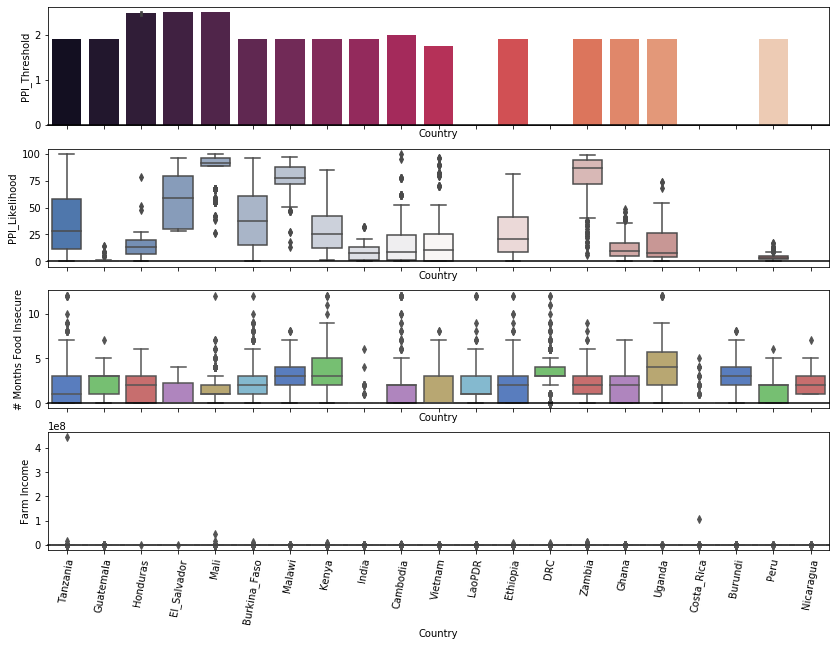

In [63]:
#generate plot grid
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

#PPI_Threashold
sns.barplot(x="Country", y="PPI_Threshold",data=data, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("PPI_Threshold")

#Likelihood
sns.boxplot(x="Country", y="PPI_Likelihood",data=data, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("PPI_Likelihood")

# Months Food Insecure
sns.boxplot(x="Country",
            y="NrofMonthsFoodInsecure",
            data=data, 
            palette="muted", 
            ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("# Months Food Insecure")



# Months Food Insecure
sns.boxplot(x="Country",
            y="farm_income_USD_PPP_pHH_Yr",
            data=data,
            palette="muted",
            ax=ax4)

ax4.axhline(0, color="k",
            clip_on=False)

ax4.set_ylabel("Farm Income")

#don't show outliers

#3rd plot 
ax4.set_xticklabels(violin.get_xticklabels(), rotation=80)


In [54]:
data[["Country", "total_income_USD_PPP_pHH_Yr"]].groupby("Country").describe()

total_income_USD_PPP_pHH_Yr                               \
                                   count           mean           std   
Country                                                                 
Burkina_Faso                      3057.0   11244.860535  2.611908e+05   
Burundi                            333.0   52914.803454  9.300429e+05   
Cambodia                           633.0    5751.723000  1.063800e+05   
Costa_Rica                         204.0  528739.233931  7.428386e+06   
DRC                                851.0   12233.632096  3.080075e+05   
El_Salvador                         16.0    1222.004428  1.908400e+03   
Ethiopia                           960.0   13560.735776  2.456101e+05   
Ghana                              614.0    7020.878462  1.549330e+05   
Guatemala                          163.0    1771.329448  9.444169e+03   
Honduras                            29.0    5298.810488  1.016655e+04   
India                              156.0    1657.079615  3.368130e+03   
Kenya                             1191.0   24042.628326  4.555685e+05   
LaoPDR                             415.0    2117.604936  4.203407e+03   
Malawi                             157.0    2474.444898  4.515575e+03   
Mali                               599.0  817140.085787  1.884547e+07   
Nicaragua                          220.0   11582.820763  8.778876e+04   
Peru                               171.0    2429.256983  1.649416e+04   
Tanzania                          2508.0  189176.283585  8.849123e+06   
Uganda                             130.0    2903.047027  4.022174e+03   
Vietnam                            293.0      27.433286  2.630152e+02   
Zambia                             610.0   67596.945468  8.320621e+05   

                                                                              
                     min         25%          50%          75%           max  
Country                                                                       
Burkina_Faso    0.000000    0.000000   164.857702   870.082318  1.305123e+07  
Burundi         0.000000    0.000000   118.067631   553.442021  1.697222e+07  
Cambodia        0.000000  425.972942   958.439120  1950.347542  2.677544e+06  
Costa_Rica      0.000000    0.000000  2322.202274  9391.957300  1.061068e+08  
DRC             0.000000    0.125219     2.706671   456.216502  8.974742e+06  
El_Salvador     0.000000  144.677076   626.068297  1180.886445  7.523208e+03  
Ethiopia        0.000000    0.000000   461.141196  1383.423589  6.917960e+06  
Ghana           0.000000    0.000000   128.209484   632.143984  3.839447e+06  
Guatemala       0.000000    0.000000     0.948989   395.609925  1.027281e+05  
Honduras        0.000000  143.844540  1467.214309  5385.539580  4.936745e+04  
India           0.000000    0.000000    10.514435  1676.947349  2.015891e+04  
Kenya           0.000000  172.072648   668.329087  2295.735906  1.355107e+07  
LaoPDR          0.000000    0.000000   400.498550  2772.671604  5.077070e+04  
Malawi          0.000000  193.327780   601.732716  3010.113536  3.383236e+04  
Mali         -214.256927  314.315280  1141.057096  2742.488668  4.607937e+08  
Nicaragua       0.000000  499.211614  1909.412455  4808.868272  1.295387e+06  
Peru            0.000000   27.042397   306.817398   844.925596  2.082655e+05  
Tanzania        0.000000    2.594772   271.833223  1695.260534  4.428713e+08  
Uganda          0.000000  417.982161  1267.079734  3339.258103  2.207270e+04  
Vietnam         0.000000    1.848238     5.544714    11.861827  4.413703e+03  
Zambia          0.000000    0.000000    98.111448   500.012426  1.391562e+07

In [64]:
data.groupby(["Country"])["PPI_Likelihood", "NrofMonthsFoodInsecure","HHsizemembers"].median()

#data.groupby(["Country", "Head_EducationLevel"])["PPI_Likelihood", "NrofMonthsFoodInsecure"].count()

#likelihood that household is below poverity line

,PPI_Likelihood,NrofMonthsFoodInsecure,HHsizemembers
Country,,,
Burkina_Faso,37.70,2,9
Burundi,NaN,3,6
Cambodia,8.40,2,5
Costa_Rica,NaN,0,3
DRC,NaN,3,8
El_Salvador,58.65,0,4
Ethiopia,20.60,2,5
Ghana,9.80,2,7
Guatemala,0.00,3,5


In [74]:
#test model 

def getNAs(df):

    colNames = []
    percentNA = []
    for i in df.columns:
        colNames.append(i)
        numNA = df[i].isna().sum()
        percent = (numNA/len(df))*100
        percentNA.append(percent)
        
    colNames = pd.DataFrame(colNames)
    colNames = colNames.rename(columns={0: "label"})
    percentNA = pd.DataFrame(percentNA)
    percentNA = percentNA.rename(columns={0: "numNA"})
    d = pd.concat([colNames,percentNA], axis = 1).sort_values(by=['numNA'], ascending = False)

        
    return d



def remove_columns(df, threshold):
    '''drop columns by a threshold (percentage of na)'''
    data = getNAs(df)
    column_names = data[data.numNA >= threshold].label
    clean_data = df.drop(column_names, axis = 1)
    
    return clean_data


In [87]:
data.shape

(13310, 51)

In [93]:

c_data = remove_columns(data, 25)
c_data

drop_data=c_data.dropna()

In [94]:
drop_data.shape

(5487, 44)

,ID_PROJ,ID_COUNTRY,YEAR,ITERATION,SURVEY_ID,ID_HH,GPS_LAT,GPS_LON,GPS_ALT,Country,...,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput
6715,SCN,ZM,2017,1,ZM_SCN_2017,ZM_2017_SCN_563_1,-13.86,32.47,1082.68,Zambia,...,0.000000,1.000000,0.000000,7.234320e+03,3.524204e+03,0,9.595600,0.656357,3.436426e-01,5.0
1949,HAM,KH,2016,1,KH_HAM_2016,KH_2016_HAM_21_1,NaN,NaN,NaN,Cambodia,...,0.000000,1.000000,0.555556,9.800382e+04,0.000000e+00,2,NaN,0.666667,3.333333e-01,NaN
4816,GLV,TZ,2017,1,TZ_GLV_2017,TZ_2017_GLV_456_1,-3.71,34.43,1104.00,Tanzania,...,2560.655224,0.000723,1.000000,4.560124e+03,4.557868e+03,2,NaN,1.000000,0.000000e+00,NaN
7368,TA1,ET,2017,1,ET_TA1_2017,ET_2017_TA1_168_1,8.16,38.82,1652.00,Ethiopia,...,0.000000,1.000000,1.000000,1.637108e+03,0.000000e+00,0,NaN,NaN,NaN,NaN
8856,CLP,BI,2018,1,BI_CLP_2018,BI_2018_CLP_265_1,-3.36,29.86,0.00,Burundi,...,0.000000,NaN,NaN,0.000000e+00,0.000000e+00,0,18.356800,NaN,NaN,22.0
10050,CRA,TZ,2018,1,TZ_CRA_2018,TZ_2018_CRA_56_1,-7.96,35.94,1828.83,Tanzania,...,0.000000,1.000000,1.000000,2.065205e+02,1.065205e+02,0,NaN,0.000000,1.000000e+00,NaN
6567,SCN,ZM,2017,1,ZM_SCN_2017,ZM_2017_SCN_415_1,-14.20,31.39,921.28,Zambia,...,0.000000,1.000000,0.034483,1.799728e+03,2.920740e+02,4,16145.391340,NaN,NaN,200.0
1993,HAM,KH,2016,1,KH_HAM_2016,KH_2016_HAM_65_1,NaN,NaN,NaN,Cambodia,...,0.000000,1.000000,0.163763,1.668886e+04,0.000000e+00,2,NaN,0.500000,5.000000e-01,NaN
7357,TA1,ET,2017,1,ET_TA1_2017,ET_2017_TA1_157_1,8.19,38.81,1679.00,Ethiopia,...,219.000000,0.834809,0.478244,5.662554e+03,1.488641e+03,0,18971.311654,1.000000,0.000000e+00,350.0
3958,SRL,ET,2016,1,ET_SRL_2016,ET_2016_SRL_167_1,NaN,NaN,NaN,Ethiopia,...,0.000000,1.000000,0.228898,7.077373e+03,2.361570e+03,0,28005.671846,0.969144,3.085573e-02,100.0


In [114]:
## Preprocessing and Scale

# obtain raw data
X = drop_data.loc[:, drop_data.columns != 'PPI_Likelihood']
y = drop_data.loc[:, "PPI_Likelihood"]

# Train Test Split the raw
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = .3)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


#get numerics
te_numerics = X_test.columns[X_test.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
tr_numerics = X_train.columns[X_train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]



scaler = preprocessing.StandardScaler()

#scale numerics only
X_test[te_numerics] = scaler.fit_transform(X_test[te_numerics])
X_train[tr_numerics] = scaler.fit_transform(X_train[tr_numerics])

#



# Impute NaN's
#imputer = impute.SimpleImputer(missing_values= np.nan, strategy='mean')
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.fit_transform(X_test)

# Add ones column for X_tr and X_te
X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))


#List for optimally tuned model Train and Test MSE's
op_mods = []


ValueError: could not convert string to float: 'HHsizemembers'

In [115]:
X_train[tr_numerics]

,YEAR,ITERATION,HHsizemembers,HHsizeMAE,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,...,livestock_prodsales_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,Gender_MaleControl,Gender_FemaleControl
5786,-0.134119,0.0,-0.432601,-0.330157,-0.213629,-0.048396,0.038853,-0.324583,0.410988,1.875070,...,-0.214784,-0.273725,-0.215685,0.535513,-1.291635,-0.015661,-0.016123,-0.614132,-1.132752,1.132752
8032,-0.134119,0.0,2.737053,2.875434,1.209946,-0.086693,-0.530591,3.080877,-0.424699,0.894241,...,2.041803,1.687113,-0.215685,0.535513,-1.044879,-0.016468,-0.016126,-0.614132,0.565665,-0.565665
10247,0.914794,0.0,-0.864826,-0.872464,-0.192997,-0.293935,1.177740,-0.324583,-0.006855,-1.067419,...,-0.095811,-0.170345,-0.215685,0.535513,-0.030917,-0.016561,-0.016144,1.097237,-0.862793,0.862793
10647,0.914794,0.0,1.152226,1.134649,0.384685,3.903310,0.038853,-0.324583,0.410988,1.384656,...,4.231991,4.917646,3.071675,-0.237879,1.020599,-0.016552,-0.016141,0.669395,0.700858,-0.700858
7804,-0.134119,0.0,0.575926,0.621291,-0.079524,-0.241513,0.038853,3.080877,-0.006855,0.894241,...,0.083585,-0.014460,-0.215685,0.535513,0.506524,-0.016561,-0.016144,-0.614132,-0.509015,0.509015
386,-2.231944,0.0,2.160752,2.240491,-0.027945,1.030725,-0.530591,3.080877,0.410988,-1.067419,...,0.968333,0.754332,-0.215685,0.535513,0.952359,-0.016559,-0.016144,-0.186290,0.700858,-0.700858
5033,-0.134119,0.0,-0.000375,-0.083128,0.425948,1.206187,0.038853,-0.324583,-0.006855,1.384656,...,-0.246613,-0.167857,0.114997,-2.424042,1.017725,-0.016561,-0.016142,-0.614132,0.700858,-0.700858
10133,0.914794,0.0,-0.144450,-0.088918,-0.110471,-0.090768,-1.100035,-0.324583,-0.006855,-1.067419,...,0.131424,0.027109,-0.215685,0.535513,-0.216090,-0.016560,-0.016143,0.669395,-0.488119,0.488119
7281,-0.134119,0.0,-0.432601,-0.397705,-0.079524,-0.238797,0.608296,-0.324583,-0.842543,0.403826,...,-0.130280,-0.200297,-0.215685,0.535513,1.020599,-0.016561,-0.016142,-0.614132,-2.426445,2.426445
12754,0.914794,0.0,-0.864826,-0.824216,-0.195576,-0.257267,0.608296,-0.324583,-1.678230,-0.086589,...,-0.173647,-0.237980,-0.215685,0.535513,0.130855,-0.016562,-0.016144,2.380764,0.700858,-0.700858


In [123]:
#RIDGE

rr = linear_model.Ridge(alpha=1)

rr.fit(X_train[tr_numerics], y_train)
pred = rr.predict(X_train[tr_numerics])

rr = linear_model.Ridge()


#Create Grid search dictionary for all alphas we wish to evaluate
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

#Use GridSearchCV with cv = 5, this will output the 'optimal model' 
rr_op = model_selection.GridSearchCV(rr, grid, cv=5, n_jobs=-1)

#fit opti model
rr_op.fit(X_train[tr_numerics], y_train)

# summarize
print(rr_op.best_params_,rr_op.best_score_,rr_op.best_index_ ) # best is alpha = 0

# Store opitmal alpha
#op_alpha = rr_op.best_params_

pred_te = rr_op.predict(X_test[te_numerics])

metrics.mean_squared_error(pred_te, y_test)

# Final model with optimal alpha
#rr_final = linear_model.Ridge(alpha = op_alpha)
#rr_final.fit(X_train[tr_numerics],y_train)
#pred_tr = rr_final.predict(X_train[tr_numerics])
#pred_te = rr_final.predict(X_test[tr_numerics])
#b
#op_mods.append(("Ridge", metrics.mean_squared_error(pred_tr, y_train),metrics.mean_squared_error(pred_te, y_test)))

{'alpha': 0.99} 0.12156626882638248 99


641.6349603004388

In [108]:
te_numerics


Index(['YEAR', 'ITERATION', 'HHsizemembers', 'HHsizeMAE', 'LandCultivated',
       'LivestockHoldings', 'NrofMonthsFoodInsecure', 'PPI_Threshold',
       'score_HDDS_GoodSeason', 'score_HDDS_farmbasedGoodSeason',
       'score_HDDS_purchasedGoodSeason', 'score_HDDS_BadSeason',
       'score_HDDS_farmbasedBadSeason', 'score_HDDS_purchasedBadSeason',
       'TVA_USD_PPP_pmae_pday', 'currency_conversion_factor',
       'total_income_USD_PPP_pHH_Yr', 'offfarm_income_USD_PPP_pHH_Yr',
       'farm_income_USD_PPP_pHH_Yr', 'value_farm_produce_USD_PPP_pHH_Yr',
       'crop_sales_USD_PPP_pHH_Yr', 'value_crop_produce_USD_PPP_pHH_Yr',
       'value_crop_consumed_USD_PPP_pHH_Yr',
       'livestock_prodsales_USD_PPP_pHH_Yr',
       'value_livestock_production_USD_PPP_pHH_Yr',
       'value_livestock_prod_consumed_USD_PPP_pHH_Yr', 'Market_Orientation',
       'Livestock_Orientation', 'Food_Availability_kCal_MAE_day',
       'Food_Self_Sufficiency_kCal_MAE_day', 'NrofMonthsWildFoodCons',
       'Gende